# SARSA & Q - Learning

# 연습데이터 : Frozen Lake
![좋은거](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSKrspq5EvLOC2Rv8dfsw1OVqD1WjN5YsmgAHVCVn3x8zLhM5Y8&usqp=CAU)

**학습목표**

1. SARSA의 업데이트 맛 본다.
2. Q-learning의 업데이트를 맛 본다.
3. 일단 코드 짤 수 있다.

# 미리 알아야 했지만..

[미리 알면 참 좋은 것. 1](https://image.slidesharecdn.com/reinforcementlearning-170904070210/95/introduction-of-deep-reinforcement-learning-22-638.jpg?cb=1504578048)

[역시 알아야 참 좋은 것. 2](http://www.modulabs.co.kr/files/attach/images/334/237/003/18eba72dcfeafa6e6280055a95078ffa.png)

# 필요 라이브러리 불러오기

1. 이런 연습에서는 딱히 비디오 영상이 필요하지 않다.

In [1]:
!pip install gym

In [2]:
import numpy as np
import gym

# 사용할 환경 불러오기

In [3]:
gym.envs.registration.register(
    id="FrozenLake-v3", entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

# gym.envs.registration.register(
#     id="FrozenLake-v8", entry_point='gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name': '8x8', 'is_slippery': True}
# )

In [4]:
env = gym.make('FrozenLake-v3')
# env = gym.make('FrozenLake-v8')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Discrete(16)
action space: Discrete(4)


# SARSA와, Q-learning 준비 해보기

**핵심 코드**
1. SARSA : S,A,R,S,A 가 끝나면 Q업데이트!
```
Q[s,a] = Q[s,a] + alpha * ((r + gama* Q[s1,a1]) - Q[s,a])
```
2. Q-Learning : S,A,R,S 후 max A, 그다음 Q업데이트!
```
Q[s,a] = Q[s,a] + alpha*(r + gama*np.max(Q[s1,:]) - Q[s,a])
```


# I. SARSA

### 1. Q-Table을 준비하자.

* Q = np.zeros([state의 수, action의 수])
* 활용 예시
    * Q[2, 3]에는 10이 담겨있음.
    * Q[2, 1]에는 5가 담겨있음.
    * 2번 state에선 3번 액션이 1번 액션보다 2배 가치 있음!

* env.action_space.n, env.observation_space.n 이용

In [7]:
## Your Code Here
print(env.observation_space.n, env.action_space.n)
Q = np.zeros(shape=(env.observation_space.n, env.action_space.n))
Q.shape

16 4


(16, 4)

In [11]:
print(Q)
# for rows in Q.reshape([4,4,4]):
#     print(*rows)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### 2. parameter들

In [12]:
alpha = 0.2
gamma = 0.999 # 할인율!
n_episod = 20000
epsilon = 0.15

### 3. SARSA!

In [13]:
Q = np.zeros([env.observation_space.n,
              env.action_space.n])

rewards_sarsa = []

for i in range(n_episod) : 
    s0 = env.reset()
    done = False
    a0 = env.action_space.sample() # 처음엔 랜덤무브

    while True :
        s1, r1, done, _ = env.step(a0) # 일단 움직인다.

        if np.random.uniform() < epsilon :  # 무슨 뜻? 15% 확률로 램덤하게 액션 선택
            a1 = env.action_space.sample()
        else : 
            greedy_actions = np.argwhere(Q[s1, :] == np.amax(Q[s1, :])).reshape(-1)
            a1 = np.random.choice(greedy_actions) # 무슨 뜻? 해당 state에서 제일 좋은 action을 선택

        # Update 한다! 매 action 마다
        # ( s0, a0, r1, s1, a1 ) 로 부터!
        # (참고) Monte Carlo에서는 전체 episode 끝난후에 value 업데이트함.
        
        Q[s0, a0] = Q[s0, a0] + alpha * (r1 + gamma*Q[s1, a1] - Q[s0, a0])

        if done == True: # 종료되었으면
            rewards_sarsa.append(r1)
            env.close() # 환경 닫고.
            break # 멈춰야지

        s0 = s1 # 다음 루프에선 이것이 직전 state
        a0 = a1 # 다음 루프에선 이것이 직전 action

    if (i+1) % 4000 == 0 :
        print('===========  에피소드 : {}  ============'.format(i+1))
        for rows in Q.reshape([4,4,4]):
            print(*rows)

===========  에피소드 : 4000  ============
[0.74057811 0.68653201 0.76050793 0.75164905] [0.73171577 0.         0.79008649 0.73343664] [0.59271899 0.84435367 0.58047967 0.75240723] [0.81302075 0.         0.38599844 0.31638143]
[0.62481225 0.63266236 0.         0.77766159] [0. 0. 0. 0.] [0.         0.98715831 0.         0.83062391] [0. 0. 0. 0.]
[0.57175697 0.         0.86572409 0.59901015] [0.69551943 0.90704134 0.99129763 0.        ] [0.9516007  0.99759026 0.         0.91534216] [0. 0. 0. 0.]
[0. 0. 0. 0.] [0.         0.97643695 0.99849229 0.89288505] [0.99701178 0.99841344 1.         0.95604611] [0. 0. 0. 0.]
===========  에피소드 : 8000  ============
[0.6713024  0.60497868 0.73409232 0.65467728] [0.64460479 0.         0.82296709 0.64621795] [0.70634703 0.92433712 0.54665044 0.67389061] [0.74217872 0.         0.63133978 0.50351517]
[0.57836342 0.6991201  0.         0.66378138] [0. 0. 0. 0.] [0.         0.98101015 0.         0.72639947] [0. 0. 0. 0.]
[0.63267939 0.         0.89373718 0.714949

### 학습 완료된 것 구경
### 무한 루프 주의
위 에서, 학습을 1 ~ 2회만 시켜보고 아래를 해봐도 좋다.<br>
이미, 위에서 Q 테이블을 만들어 놓아 Q 테이블 보고 최적만 따라 Action 수행

In [15]:
s0 = env.reset()
done = False
a0 = env.action_space.sample() # 처음엔 랜덤무브

while True :
    env.render()
    s1, r1, done, _ = env.step(a0) # 일단 움직인다.

    greedy_actions = np.argwhere(Q[s1, :] == np.amax(Q[s1, :])).reshape(-1)
    a1 = np.random.choice(greedy_actions) # 무슨 뜻? Greed 방법만으로 최적의 action만 수행

    # 무한 루프 걸린다면 위의 두줄 주석, 아래를 주석 해제
    # if np.random.uniform() < epsilon :  # 무슨 뜻?
    #     a1 = env.action_space.sample()
    # else : 
    #     greedy_actions = np.argwhere(Q[s1, :] == np.amax(Q[s1, :])).reshape(-1)
    #     a1 = np.random.choice(greedy_actions) # 무슨 뜻?


    if done == True: # 종료되었으면
        env.render()
        env.close() # 환경 닫고.
        break # 멈춰야지

    s0 = s1 # 다음 루프에선 이것이 직전 state
    a0 = a1 # 다음 루프에선 이것이 직전 action


SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


### SARSA 학습코드를 보고, 진행 순서를 정리해보자.

1. env.reset()을 통해 state 확인
2. env.action_space.sample()을 통해 action 확인
3. env.step을 통해 다음 state, 다음 reward를 확인
4. epsilon 15% 확률로 random action(exploration)이나 최적 action(exploitation) 선택
  * 최적 action을 경우 
  * 매 action 마다 ( s0, a0, r1, s1, a1 ) 로 부터 아래와 같이 Q 테이블 업데이트
  * Q[s0, a0] = Q[s0, a0] + alpha * (r1 + gamma*Q[s1, a1] - Q[s0, a0])
5. done == True 이면 종료

# II. Q-Learning


## SARSA와 Q-learning 차이
* MC와 TD(sarsa)는 모두 on-policy control
* Q-learning은 off-policy control
  * off-policy control은 action을 취하는 policy(behavior policy)와 improve하는 policy(target policy)를 다르게 함

### 1. Q-Table을 준비하자.

* Q = np.zeros([state의 수, action의 수])
* 활용 예시
    * Q[2, 3]에는 10이 담겨있음.
    * Q[2, 1]에는 5가 담겨있음.
    * 2번 state에선 3번 액션이 1번 액션보다 2배 가치 있음!

* env.action_space.n, env.observation_space.n 이용

In [18]:
env.observation_space, env.action_space

(Discrete(16), Discrete(4))

In [20]:
## Your Code Here
Q = np.zeros(shape=(env.observation_space.n, env.action_space.n))
Q.shape

(16, 4)

In [21]:
print(Q)
# for rows in Q.reshape([4,4,4]):
#     print(*rows)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### 2. parameter들

In [22]:
alpha = 0.2
gamma = 0.999 # 할인율!
n_episod = 20000
epsilon = 0.15

### 3. Q-learning

In [23]:
Q = np.zeros([env.observation_space.n,
              env.action_space.n])

rewards_ql = []

for i in range(n_episod) : 
    s0 = env.reset()
    done = False

    while True :
        # 행동을 선택
        if np.random.uniform() < epsilon :  # 무슨 뜻? 15% 확률로 random action 수행
            a0 = env.action_space.sample()
        else : 
            greedy_actions = np.argwhere(Q[s0, :] == np.amax(Q[s0, :])).reshape(-1)
            a0 = np.random.choice(greedy_actions) # 무슨 뜻? 해당 state에서 제일 좋은 action을 선택

        # a0 를 이용하여, 환경과 상호작용하고, s1, r1, done, _를 선언하시오.
        s1, r1, done, _ = env.step(a0)
        
        # ( s0, a0, r1, s1 ) 로 부터! 차이점 주의!
        Q[s0, a0] = Q[s0, a0] + alpha * (r1 + gamma*np.max(Q[s1,:]) - Q[s0, a0])

        if done == True: # 종료되었으면
            rewards_ql.append(r1)
            env.close() # 환경 닫고.
            break # 멈춰야지

        s0 = s1 # 다음 루프에선 이것이 직전 state

    if (i+1) % 4000 == 0 :
        print('===========  에피소드 : {}  ============'.format(i+1))
        for rows in Q.reshape([4,4,4]):
            print(*rows)
        

===========  에피소드 : 4000  ============
[0.99401498 0.99500999 0.99302097 0.99401498] [0.99401498 0.         0.48189011 0.8597347 ] [0.80704862 0.17284624 0.         0.        ] [0. 0. 0. 0.]
[0.99500999 0.996006   0.         0.99401498] [0. 0. 0. 0.] [0.         0.92995379 0.         0.        ] [0. 0. 0. 0.]
[0.996006   0.         0.997003   0.99500999] [0.996006 0.998001 0.998001 0.      ] [0.98263467 0.999      0.         0.68618659] [0. 0. 0. 0.]
[0. 0. 0. 0.] [0.       0.998001 0.999    0.997003] [0.998001 0.999    1.       0.998001] [0. 0. 0. 0.]
===========  에피소드 : 8000  ============
[0.99401498 0.99500999 0.99302097 0.99401498] [0.99401498 0.         0.83657528 0.94934572] [0.97305234 0.17284624 0.         0.        ] [0. 0. 0. 0.]
[0.99500999 0.996006   0.         0.99401498] [0. 0. 0. 0.] [0.         0.99800097 0.         0.44697376] [0. 0. 0. 0.]
[0.996006   0.         0.997003   0.99500999] [0.996006 0.998001 0.998001 0.      ] [0.997003   0.999      0.         0.99700281] 

### 학습 완료된 것 구경

위 에서, 학습을 1 ~ 2회만 시켜보고 아래를 해봐도 좋다.<br>
이미, 위세어 Q-learning으로 Q 테이블 업데이트한 상태임

In [24]:
s0 = env.reset()
done = False
a0 = env.action_space.sample() # 처음엔 랜덤무브

while True :
    env.render()
    s1, r1, done, _ = env.step(a0) # 일단 움직인다.

    greedy_actions = np.argwhere(Q[s1, :] == np.amax(Q[s1, :])).reshape(-1)
    a1 = np.random.choice(greedy_actions) # 무슨 뜻?

    if done == True: # 종료되었으면
        env.render()
        env.close() # 환경 닫고.
        break # 멈춰야지

    s0 = s1 # 다음 루프에선 이것이 직전 state
    a0 = a1 # 다음 루프에선 이것이 직전 action


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


### Q-learning 학습 코드를 보고 진행 순서를 정리하자.

1. env.reset()을 통해 state 확인
2. epsilon 15% 확률로 random action(exploration)이나 최적 action(exploitation) 선택
  * 최적 action을 경우 
  * (sarsa)
    * 매 action 마다 ( s0, a0, r1, s1, a1 ) 로 부터 아래와 같이 Q 테이블 업데이트
    * Q[s0, a0] = Q[s0, a0] + alpha * (r1 + gamma*Q[s1, a1] - Q[s0, a0])
  * (Q-learning)
    * 매 action 마다 ( s0, a0, r1, s1 ) 로 부터 아래와 같이 Q 테이블 업데이트
    * Q[s0, a0] = Q[s0, a0] + alpha * (r1 + gamma*np.max(Q[s1,:]) - Q[s0, a0])
3. env.step을 통해 다음 state, 다음 reward를 확인
4. done == True 이면 종료
       

# Bonus 시각화 :

In [25]:
import matplotlib.pyplot as plt

In [26]:
win_ratio_s = []
win_ratio_ql = []

sliding_windows = 100
for i in range(n_episod - 100 + 1) :
    wr_s = sum(rewards_sarsa[i:i+sliding_windows])/sliding_windows
    wr_q = sum(rewards_ql[i:i+sliding_windows])/sliding_windows
    win_ratio_s.append(wr_s)
    win_ratio_ql.append(wr_q)

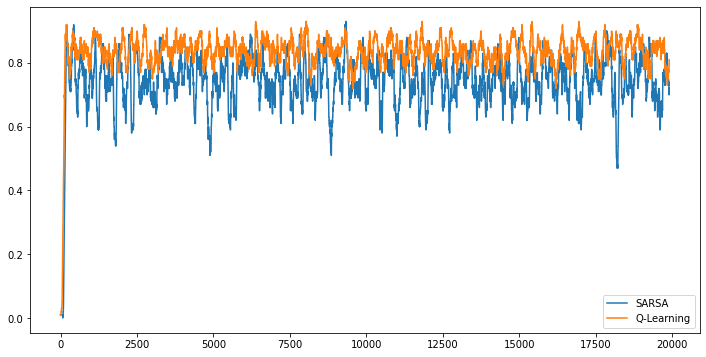

In [27]:
plt.figure(figsize=(12,6))
plt.plot(win_ratio_s, label='SARSA')
plt.plot(win_ratio_ql, label='Q-Learning')
plt.legend()
plt.show()